https://stackoverflow.com/questions/79067652/gamma-function-fitting-optimizewarning-covariance-of-the-parameters-could-not-b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

In [12]:
law = stats.gamma(a=1.5, scale=0.8)
data = law.rvs(1_000)

In [13]:
def likelihood_factory(data):
    def wrapped(parameters):
        return - np.sum(stats.gamma(a=parameters[0], scale=parameters[1]).logpdf(data))
    return wrapped

In [14]:
likelihood = likelihood_factory(data)

In [21]:
solution = optimize.minimize(likelihood, x0=[1., 1.], tol=1e-4)
solution

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1126.2309539053672
        x: [ 1.508e+00  7.876e-01]
      nit: 8
      jac: [-1.526e-05 -3.052e-05]
 hess_inv: [[ 3.781e-03 -1.978e-03]
            [-1.978e-03  1.447e-03]]
     nfev: 33
     njev: 11

In [16]:
xlin = np.linspace(data.min(), data.max(), 200)

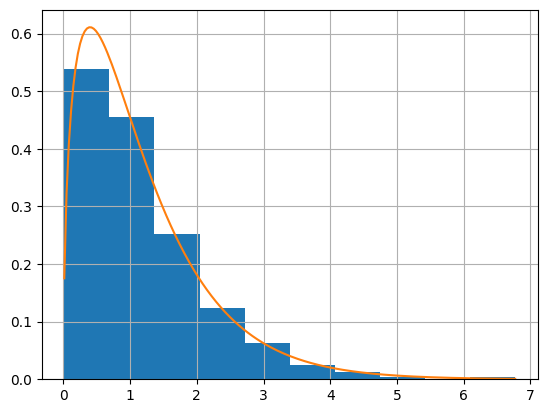

In [17]:
fig, axe = plt.subplots()
axe.hist(data, density=1.)
axe.plot(xlin, stats.gamma(a=solution.x[0], scale=solution.x[1]).pdf(xlin))
axe.grid()